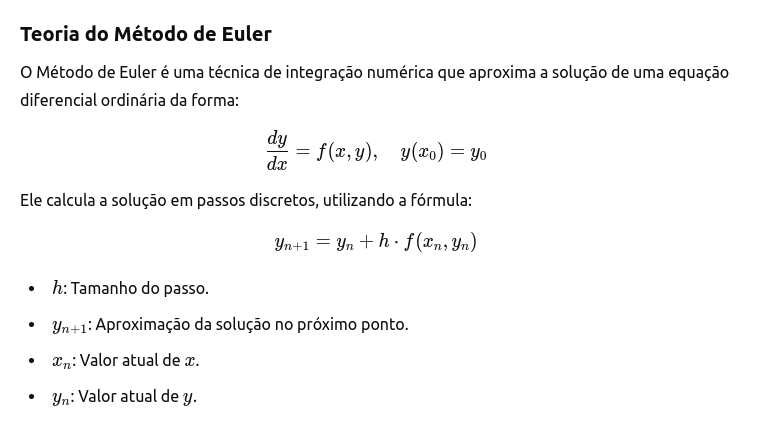

# Método de Euler

O **Método de Euler** é uma técnica simples de integração numérica que aproxima a solução de uma equação diferencial ordinária (EDO) da forma:
\[
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
\]

Ele calcula a solução em passos discretos, utilizando a fórmula:
\[
y_{n+1} = y_n + h \cdot f(x_n, y_n)
\]
onde:
- \( h \) é o tamanho do passo,
- \( y_{n+1} \) é a solução aproximada no próximo ponto,
- \( x_n \) é o valor atual de \( x \),
- \( y_n \) é o valor atual de \( y \).

## Limitações do Método de Euler
1. **Baixa precisão**:
   - O erro acumulado é proporcional ao tamanho do passo \( h \).
   - A precisão é limitada, pois o método assume que a derivada \( f(x, y) \) é constante em cada intervalo.

2. **Estabilidade**:
   - Para algumas EDOs, o método pode ser instável e gerar soluções divergentes.

3. **Passos muito pequenos**:
   - Para melhorar a precisão, é necessário usar passos menores (\( h \)), o que aumenta o custo computacional.

## Soluções Mais Eficientes
Se buscamos maior eficiência e precisão, existem métodos mais avançados, como:

### **1. Método de Euler Modificado**
Também conhecido como **Método do Ponto Médio**, ele melhora a precisão ao estimar a derivada no ponto médio do intervalo:
\[
y_{n+1} = y_n + h \cdot f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot f(x_n, y_n)\right)
\]
Este método é uma boa melhoria em relação ao Método de Euler simples.

### **2. Método de Runge-Kutta de 4ª Ordem (RK4)**
Um dos métodos mais populares, conhecido por sua alta precisão e eficiência. A fórmula geral é:
\[
y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\]
onde:
- \( k_1 = f(x_n, y_n) \),
- \( k_2 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right) \),
- \( k_3 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right) \),
- \( k_4 = f\left(x_n + h, y_n + h \cdot k_3\right) \).

O RK4 oferece uma solução precisa com erro proporcional a \( h^4 \), tornando-o amplamente utilizado em problemas práticos.

### **3. Métodos Implícitos**
Para sistemas rígidos (stiff systems), os métodos implícitos, como o **Backward Euler**, são mais estáveis. Eles resolvem a equação:
\[
y_{n+1} = y_n + h \cdot f(x_{n+1}, y_{n+1})
\]
Aqui, \( y_{n+1} \) precisa ser resolvido iterativamente.

## Conclusã


In [1]:
def euler_method(f, x0, y0, h, n):
    """
    Resolve uma EDO usando o Método de Euler.

    Parâmetros:
        f (function): A função f(x, y) que define dy/dx.
        x0 (float): O valor inicial de x.
        y0 (float): O valor inicial de y.
        h (float): O tamanho do passo.
        n (int): O número de passos.

    Retorna:
        list: Lista de pares (x, y) representando a solução aproximada.
    """
    x = x0
    y = y0
    results = [(x, y)]

    for _ in range(n):
        y = y + h * f(x, y)
        x = x + h
        results.append((x, y))
    
    return results


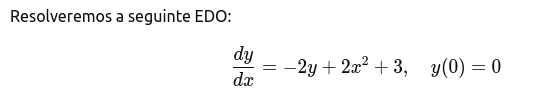

In [10]:
# Definir a função f(x, y) para a EDO
def f(x, y):
    return -2 * y + 2 * x**2 + 3

# Condições iniciais
x0 = 0  # Valor inicial de x
y0 = 0  # Valor inicial de y
h = 0.1  # Tamanho do passo
n = 20  # Número de passos

# Resolver a EDO
resultado = euler_method(f, x0, y0, h, n)

# Exibir a solução
for i, (x, y) in enumerate(resultado):
    print(f"Passo {i}: x = {x:.2f}, y = {y:.4f}")


Passo 0: x = 0.00, y = 0.0000
Passo 1: x = 0.10, y = 0.3000
Passo 2: x = 0.20, y = 0.5420
Passo 3: x = 0.30, y = 0.7416
Passo 4: x = 0.40, y = 0.9113
Passo 5: x = 0.50, y = 1.0610
Passo 6: x = 0.60, y = 1.1988
Passo 7: x = 0.70, y = 1.3311
Passo 8: x = 0.80, y = 1.4628
Passo 9: x = 0.90, y = 1.5983
Passo 10: x = 1.00, y = 1.7406
Passo 11: x = 1.10, y = 1.8925
Passo 12: x = 1.20, y = 2.0560
Passo 13: x = 1.30, y = 2.2328
Passo 14: x = 1.40, y = 2.4242
Passo 15: x = 1.50, y = 2.6314
Passo 16: x = 1.60, y = 2.8551
Passo 17: x = 1.70, y = 3.0961
Passo 18: x = 1.80, y = 3.3549
Passo 19: x = 1.90, y = 3.6319
Passo 20: x = 2.00, y = 3.9275


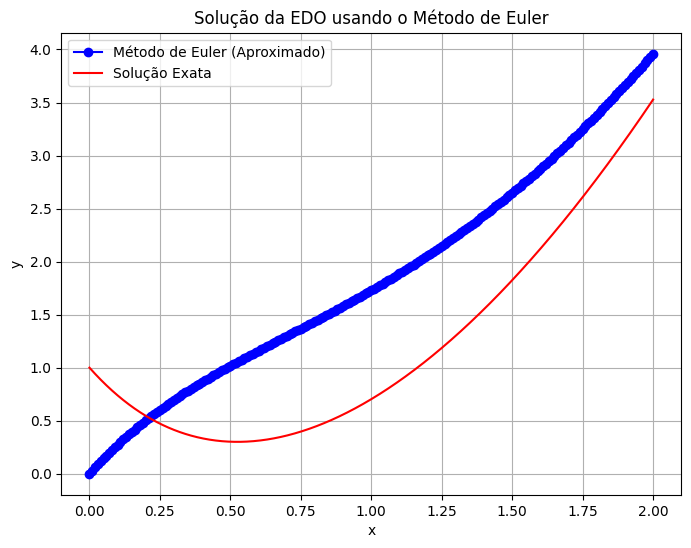

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Solução exata para comparação (caso disponível)
def exact_solution(x):
    return x**2 + 1.5 * np.exp(-2 * x) - 0.5

# Obter valores da solução aproximada
x_vals, y_vals = zip(*resultado)

# Gerar valores para a solução exata
x_exact = np.linspace(x0, x0 + n * h, 1000)
y_exact = exact_solution(x_exact)

# Plotar a solução
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, 'o-', label="Método de Euler (Aproximado)", color="blue")
plt.plot(x_exact, y_exact, '-', label="Solução Exata", color="red")
plt.title("Solução da EDO usando o Método de Euler")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


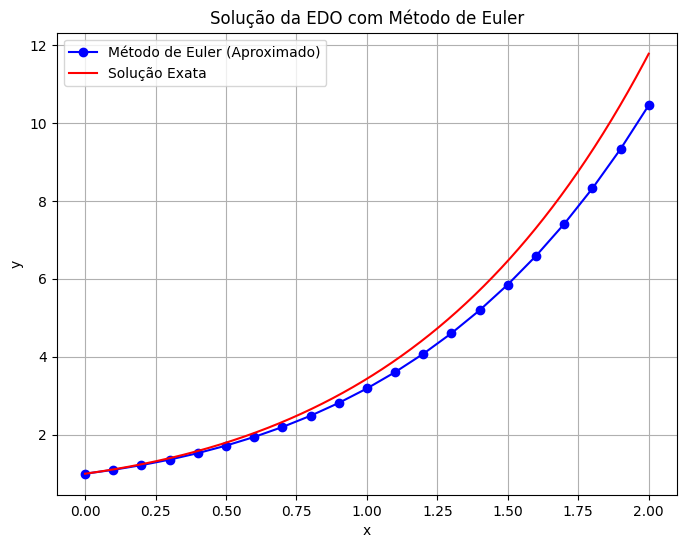

Resultados do Método de Euler:
Passo 0: x = 0.00, y = 1.0000
Passo 1: x = 0.10, y = 1.1000
Passo 2: x = 0.20, y = 1.2200
Passo 3: x = 0.30, y = 1.3620
Passo 4: x = 0.40, y = 1.5282
Passo 5: x = 0.50, y = 1.7210
Passo 6: x = 0.60, y = 1.9431
Passo 7: x = 0.70, y = 2.1974
Passo 8: x = 0.80, y = 2.4872
Passo 9: x = 0.90, y = 2.8159
Passo 10: x = 1.00, y = 3.1875
Passo 11: x = 1.10, y = 3.6062
Passo 12: x = 1.20, y = 4.0769
Passo 13: x = 1.30, y = 4.6045
Passo 14: x = 1.40, y = 5.1950
Passo 15: x = 1.50, y = 5.8545
Passo 16: x = 1.60, y = 6.5899
Passo 17: x = 1.70, y = 7.4089
Passo 18: x = 1.80, y = 8.3198
Passo 19: x = 1.90, y = 9.3318
Passo 20: x = 2.00, y = 10.4550


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Função para a EDO
def f(x, y):
    return x + y

# Solução exata para comparação
def exact_solution(x):
    return 2 * np.exp(x) - x - 1

# Método de Euler
def euler_method(f, x0, y0, h, n):
    x = x0
    y = y0
    results = [(x, y)]

    for _ in range(n):
        y = y + h * f(x, y)
        x = x + h
        results.append((x, y))
    
    return results

# Parâmetros
x0 = 0      # Valor inicial de x
y0 = 1      # Valor inicial de y
h = 0.1     # Tamanho do passo
n = 20      # Número de passos

# Resolver a EDO com Método de Euler
resultado = euler_method(f, x0, y0, h, n)

# Obter os valores de x e y
x_vals, y_vals = zip(*resultado)

# Gerar valores para a solução exata
x_exact = np.linspace(x0, x0 + n * h, 1000)
y_exact = exact_solution(x_exact)

# Plotar a solução aproximada e exata
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, 'o-', label="Método de Euler (Aproximado)", color="blue")
plt.plot(x_exact, y_exact, '-', label="Solução Exata", color="red")
plt.title("Solução da EDO com Método de Euler")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Mostrar os resultados numéricos
print("Resultados do Método de Euler:")
for i, (x, y) in enumerate(resultado):
    print(f"Passo {i}: x = {x:.2f}, y = {y:.4f}")
